In [144]:
color_code = np.array([[0, 0, 0], #UNKNOWN
                       [0, 0, 1], #BED
                       [0.9137,0.3490,0.1882], #BOOKS
                       [0, 0.8549, 0], #CEILING
                       [0.5843,0,0.9412], #CHAIR
                       [0.8706,0.9451,0.0941], #FLOOR
                       [1.0000,0.8078,0.8078], #FURNITURE
                       [0,0.8784,0.8980], #OBJECTS
                       [0.4157,0.5333,0.8000], #PAINTING
                       [0.4588,0.1137,0.1608], #SOFA
                       [0.9412,0.1373,0.9216], #TABLE
                       [0,0.6549,0.6118], #TV
                       [0.9765,0.5451,0], #WALL
                       [0.8824,0.8980,0.7608]]) #WINDOW

def class_from_instance(n):
    h, w = n.shape
    class_img_rgb = np.zeros((h,w,3),dtype=np.uint8)
    r = class_img_rgb[:,:,0]
    g = class_img_rgb[:,:,1]
    b = class_img_rgb[:,:,2]

    for instance_id in range(13):
        r[n==instance_id] = np.uint8(color_code[instance_id][0]*255)
        g[n==instance_id] = np.uint8(color_code[instance_id][1]*255)
        b[n==instance_id] = np.uint8(color_code[instance_id][2]*255)

    class_img_rgb[:,:,0] = r
    class_img_rgb[:,:,1] = g
    class_img_rgb[:,:,2] = b
    
    return class_img_rgb

In [5]:
rgb_path = "E:\\20200610\\200610-144539-596313_RGB.npy"
depth_path = "E:\\20200610\\200610-144539-596313_DEPTH.npy"

## RGB

(480, 640, 3) uint8


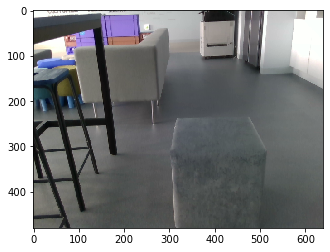

In [177]:
np_rgb = np.load(rgb_path)
img_rgb = Image.fromarray(np_rgb)
print(np_rgb.shape, np_rgb.dtype)
plt.imshow(np_rgb)

## Depth

(480, 640) uint16
(480, 640, 3) uint16


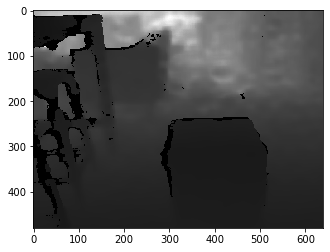

In [178]:
np_depth = np.load(depth_path)
print(np_depth.shape, np_depth.dtype)
norm_depth = cv2.normalize(np_depth, None, 0, 255, cv2.NORM_MINMAX)
np_depth = cv2.cvtColor(norm_depth, cv2.COLOR_GRAY2BGR)
print(np_depth.shape, np_depth.dtype)
plt.imshow(np_depth)

## Inference

In [ ]:
seg_path = "C:\\Users\\hello\\Desktop\\rgbd_seg\\infer\\infer_beam\\nyu_models\\rgb_imagenet_pretrain\\200610-144539-596313.npy"

(240, 320) int64


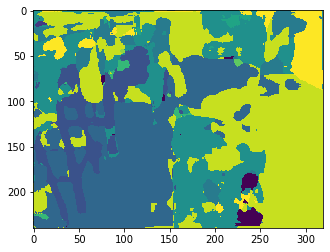

In [161]:
np_seg = np.load(seg_path)
plt.imshow(np_seg)
print(np_seg.shape, np_seg.dtype)

(480, 640, 3) uint8


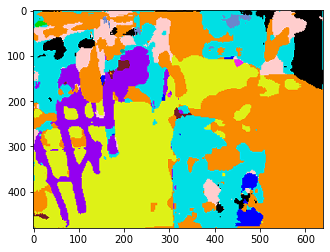

In [162]:
np_seg = class_from_instance(np_seg)
np_seg = cv2.resize(np_seg, dsize=(640, 480), interpolation=cv2.INTER_CUBIC)
plt.imshow(np_seg)
print(np_seg.shape, np_seg.dtype)

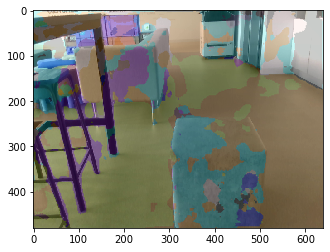

In [169]:
weight = 0.8
dst = cv2.addWeighted(np_rgb, weight, np_seg, 1 - weight, 0)
plt.imshow(dst)

# RGB + Depth Preprocess

In [134]:
source_path = "E:\\data_samples_20200610\\npy_files\\"
output_path = "E:\\preprocess\\"

img_ids = list()
for i in os.listdir(source_path):
    if i.endswith('.npy'):
        img_ids.append(i.split('.')[0].split('_')[0])
img_ids = list(set(img_ids))

In [136]:
for filename in img_ids:
    np_rgb = np.load(source_path + filename + "_RGB.npy")
    np_depth = np.load(source_path + filename + "_DEPTH.npy")
    mpimg.imsave('tmp.jpg', np_depth)
    img_depth = Image.open('tmp.jpg')
    np_depth = np.array(img_depth)[:,:,0:3]
    
    weight = 0.6
    dst = cv2.addWeighted(np_rgb, weight, np_depth, 1 - weight, 0)
    
    mpimg.imsave(output_path + filename + ".jpg", dst)